In [77]:
import pandas as pd
import json
import requests
import datetime
from pprint import pprint
from config import census_api_key
from census import Census
import scipy.stats as st
import matplotlib.pyplot as plt

In [78]:
c = Census(
    census_api_key,
    year = 2020
)

In [79]:
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B23025_005E",
        "B23025_002E"
    ),
    {'for': 'zip code tabulation area:*'}
)

# Convert to DataFrame
census_df = pd.DataFrame(census_data)

# Column renaming
census_df = census_df.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B23025_005E": 'Unemployed',
        "B23025_002E": 'Employed',
        "NAME": "Name",
        "zip code tabulation area": "Zipcode"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_df["Poverty Rate"] = 100 * census_df["Poverty Count"].astype(int) / census_df["Population"].astype(int)

# Configure the final DataFrame
census_df = census_df[
    [
        "Zipcode",
        "Population",
        "Median Age",
        'Unemployed',
        'Employed',
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate",
        
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_df)}")
census_df.head()

Number of rows in the DataFrame: 33120


,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,29590,3543.0,39.1,46.0,1179.0,30985.0,13288.0,869.0,24.527237
1,93306,74296.0,31.3,2379.0,31165.0,54450.0,23580.0,15853.0,21.337622
2,93660,4082.0,26.7,229.0,1542.0,39625.0,12475.0,1057.0,25.894170
3,93110,15777.0,46.9,286.0,7978.0,93264.0,53375.0,1332.0,8.442670
4,93212,22596.0,34.4,575.0,5074.0,42983.0,10656.0,3911.0,17.308373


In [80]:
poverty_df = census_df.sort_values(by='Poverty Count', ascending=False)
poverty_df.head()

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
24541,00725,79395.0,42.7,4910.0,31662.0,22847.0,14378.0,32123.0,40.459727
27737,10456,90479.0,32.1,5051.0,39510.0,31645.0,17050.0,31939.0,35.299904
14537,11219,87812.0,26.6,2043.0,33713.0,41907.0,17198.0,30784.0,35.056712
24188,78521,89629.0,30.0,2686.0,36177.0,33616.0,13983.0,30062.0,33.540484
6604,11206,87599.0,29.4,3835.0,41295.0,43065.0,25085.0,30051.0,34.305186


In [81]:
desired_zip_codes = ['44145', '75206', '55792', '98101', '44312', '79735']

filtered_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

filtered_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
19004,75206,39653.0,31.1,744.0,28044.0,75569.0,59167.0,4692.0,11.832648
594,44312,31887.0,43.9,987.0,17099.0,53594.0,29278.0,3014.0,9.452128
713,55792,9689.0,43.8,268.0,4473.0,44213.0,28358.0,2124.0,21.921767
24653,79735,13636.0,35.9,55.0,5094.0,51838.0,22672.0,2041.0,14.967732
29660,98101,14380.0,35.3,299.0,10707.0,91550.0,86176.0,1652.0,11.488178
24121,44145,32154.0,47.0,727.0,16966.0,92917.0,56515.0,1525.0,4.742800


In [82]:
desired_zip_codes = ['98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108', '98109', '98110', '98111', '98112', '98113', '98114', '98115', '98116', '98117', '98118', '98119', '98121', '98122', '98124', '98125', '98126', '98127', '98129', '98131', '98133','98136', '98138', '98139', '98141', '98144', '98145', '98146', '98148', '98155', '98160', '98161', '98165', '98166', '98168', '98170', '98175', '98177', '98178', '98181', '98185', '98188', '98190', '98191', '98194', '98198', '98199']

seattle_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

seattle_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
538,98105,52290.0,23.5,1585.0,28468.0,67449.0,46609.0,10977.0,20.992542
678,98118,49702.0,38.3,1323.0,28150.0,85541.0,43201.0,6489.0,13.055813
2195,98122,41152.0,31.0,1517.0,29621.0,81308.0,64120.0,5938.0,14.429432
29659,98133,49476.0,40.4,900.0,28817.0,73702.0,44104.0,4697.0,9.493492
2189,98125,44030.0,37.8,1204.0,26708.0,78263.0,47074.0,4627.0,10.508744
22000,98108,24034.0,37.1,826.0,13765.0,62530.0,35145.0,4371.0,18.186735
22065,98168,33217.0,36.5,1333.0,18114.0,66237.0,29620.0,4200.0,12.644128
10895,98103,54194.0,33.7,1073.0,37704.0,105480.0,66220.0,3980.0,7.343986
7973,98115,55519.0,37.0,1249.0,35058.0,117038.0,66166.0,3979.0,7.166916
540,98146,27622.0,39.4,588.0,15230.0,80633.0,37947.0,3935.0,14.245891


In [83]:
seattle_df = seattle_df.dropna()

In [84]:
seattle_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,30698.090909,37.487879,814.030303,18900.545455,93888.757576,59140.303030,3007.757576,9.685197
std,11795.062975,4.644739,357.515427,7565.426269,22924.554596,18994.115614,2040.324010,4.423470
min,11514.000000,23.500000,272.000000,6612.000000,58018.000000,29620.000000,910.000000,3.253789
25%,23444.000000,34.900000,588.000000,13765.000000,74608.000000,43201.000000,1652.000000,6.838172
50%,27622.000000,37.200000,757.000000,17608.000000,87882.000000,60209.000000,2430.000000,8.882969
75%,36647.000000,39.500000,1010.000000,22478.000000,117038.000000,70540.000000,3979.000000,11.488178
max,55519.000000,49.700000,1585.000000,37704.000000,134709.000000,100899.000000,10977.000000,20.992542


In [85]:
desired_zip_codes = ["75001", "75006", "75007", "75019", "75032", "75039", "75041", "75042", "75043", "75050", "75051", "75052", "75061",
          "75062", "75063", "75080", "75081", "75087", "75088", "75089", "75093", "75098", "75104", "75115", "75116", "75126",
          "75134", "75149", "75150", "75159", "75166", "75180", "75181", "75182", "75201", "75202", "75203", "75204", "75205",
          "75206", "75207", "75208", "75209", "75210", "75211", "75212", "75214", "75215", "75216", "75217", "75218", "75219",
          "75220", "75221", "75222", "75223", "75224", "75225", "75226", "75227", "75228", "75229", "75230", "75231", "75232",
          "75233", "75234", "75235", "75236", "75237", "75238", "75240", "75241", "75242", "75243", "75244", "75246", "75247",
          "75248", "75249", "75250", "75251", "75252", "75253", "75254", "75260", "75261", "75262", "75263", "75264", "75265",
          "75266", "75267", "75270", "75275", "75277", "75283", "75284", "75285", "75287", "75301", "75303", "75312", "75313",
          "75315", "75320", "75326", "75336", "75339", "75342", "75354", "75355", "75356", "75357", "75358", "75359", "75360",
          "75367", "75368", "75370", "75371", "75372", "75373", "75374", "75376", "75378", "75379", "75380", "75381", "75382",
          "75389", "75390", "75391", "75392", "75393", "75394", "75395", "75397", "75398"]

dallas_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

dallas_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
21889,75217,86811.0,27.6,1146.0,34225.0,41513.0,14450.0,24419.0,28.128924
32973,75211,77920.0,30.4,1790.0,37300.0,46226.0,18434.0,16840.0,21.611910
21888,75216,54253.0,33.8,1707.0,20542.0,29448.0,15611.0,16405.0,30.237959
11543,75228,75303.0,30.4,2179.0,36585.0,46061.0,21309.0,15681.0,20.823872
4343,75243,68253.0,33.0,2137.0,38021.0,44542.0,27077.0,13790.0,20.204240
...,...,...,...,...,...,...,...,...,...
32489,75251,3750.0,32.0,52.0,2701.0,75769.0,46457.0,172.0,4.586667
32486,75202,2739.0,33.4,104.0,2349.0,92500.0,72102.0,170.0,6.206645
20506,75166,4624.0,33.6,38.0,2557.0,101150.0,36656.0,97.0,2.097751
15913,75390,0.0,-666666666.0,0.0,0.0,-666666666.0,-666666666.0,0.0,NaN


In [86]:
dallas_df = dallas_df.dropna()

In [87]:
dallas_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,34036.292683,34.590244,875.743902,18225.914634,70395.439024,38329.378049,4605.719512,14.226568
std,19905.006869,4.770346,568.097297,10433.880763,29222.360059,22017.618709,4247.912531,10.913720
min,772.000000,26.300000,19.000000,282.000000,18245.000000,9346.000000,97.000000,2.097751
25%,19973.000000,31.175000,492.000000,10264.500000,46816.250000,21614.500000,1544.250000,6.453188
50%,31641.000000,33.550000,754.500000,17379.500000,66345.500000,31565.500000,3652.500000,11.661277
75%,46728.500000,36.225000,1192.250000,25615.750000,92405.000000,48260.250000,6374.250000,19.619978
max,94060.000000,52.900000,2792.000000,50881.000000,163935.000000,118154.000000,24419.000000,76.424870


In [88]:
desired_zip_codes = ["94101", "94102", "94103", "94104", "94105", "94107", "94108", "94109", "94110", "94111", "94112", "94114",
                 "94115", "94116", "94117", "94118", "94119", "94120", "94121", "94122", "94123", "94124", "94125", "94126",
                 "94127", "94129", "94130", "94131", "94132", "94133", "94134", "94140", "94141", "94142", "94146", "94147",
                 "94157", "94159", "94164", "94165", "94166", "94167", "94168", "94169", "94170", "94172", "94188"]

sanfransisco_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

sanfransisco_df = sanfransisco_df.dropna()

sanfransisco_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
23228,94112,85053.0,42.3,2164.0,48625.0,105340.0,39088.0,7190.0,8.453552
23193,94109,55797.0,37.1,1845.0,39394.0,98567.0,89925.0,6591.0,11.812463
23227,94110,72765.0,38.0,2255.0,48787.0,138890.0,72471.0,6550.0,9.001580
28916,94102,33264.0,39.0,1440.0,20732.0,53539.0,59038.0,6015.0,18.082612
23195,94124,36278.0,37.4,1526.0,18874.0,67094.0,33301.0,5907.0,16.282596
23209,94103,31585.0,35.7,684.0,21114.0,87587.0,69611.0,5687.0,18.005382
26456,94122,61248.0,39.6,1797.0,36716.0,122144.0,59814.0,5225.0,8.530891
29468,94134,43286.0,41.8,1487.0,24071.0,82810.0,36655.0,4798.0,11.084415
28922,94121,43843.0,42.4,1022.0,24967.0,107158.0,62564.0,4493.0,10.247930
23229,94132,30437.0,36.3,1642.0,18164.0,82557.0,46476.0,4045.0,13.289746


In [89]:
sanfransisco_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,33290.500000,38.846154,979.846154,20819.576923,122571.807692,76761.153846,3312.769231,11.720724
std,20869.592911,5.075213,647.706952,12994.828867,50897.949615,31980.580666,2180.296811,8.345049
min,438.000000,27.200000,7.000000,197.000000,53539.000000,26198.000000,68.000000,3.739716
25%,21828.250000,35.800000,452.000000,12665.250000,82620.250000,59232.000000,1295.500000,6.530290
50%,32424.500000,38.500000,946.500000,20488.000000,120972.000000,73846.500000,2988.500000,9.945899
75%,43466.000000,42.250000,1475.250000,25465.000000,165454.750000,91449.750000,5118.250000,15.157575
max,85053.000000,49.800000,2255.000000,48787.000000,250001.000000,172877.000000,7190.000000,45.351759


In [90]:
desired_zip_codes = ["44102", "44103", "44104", "44105", "44106", "44107", "44108", "44109", "44110", "44111", "44112", "44113",
             "44114", "44115", "44117", "44118", "44119", "44120", "44121", "44124", "44125", "44126", "44127", "44128", "44129",
             "44130", "44134", "44135", "44137", "44142", "44143", "44144", "44181", "44188", "44190", "44191", "44192" ,"44193",
             "44194", "44195", "44197", "44198", "44199"]

cleveland_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

cleveland_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
16035,44102,44320.0,33.8,2276.0,21650.0,32289.0,24485.0,14742.0,33.262635
17359,44105,35238.0,38.1,2753.0,15915.0,31248.0,17722.0,11673.0,33.126171
24115,44104,19295.0,30.7,1478.0,6974.0,16650.0,13411.0,10361.0,53.697849
17362,44109,39451.0,36.6,2249.0,20301.0,35987.0,21478.0,10194.0,25.839649
16037,44111,42591.0,38.2,1931.0,22665.0,45425.0,25431.0,9238.0,21.690028
24117,44120,35046.0,41.9,1506.0,17158.0,37733.0,31938.0,7904.0,22.553216
11754,44135,27732.0,38.3,1388.0,14076.0,39768.0,24177.0,7422.0,26.763306
16036,44110,18829.0,43.1,1122.0,8301.0,25244.0,17409.0,6958.0,36.953635
17360,44106,25658.0,30.6,1132.0,11540.0,30669.0,29939.0,6841.0,26.662250
24116,44108,22234.0,38.4,1571.0,9490.0,27325.0,23408.0,6807.0,30.615274


In [91]:
cleveland_df = cleveland_df.dropna()

cleveland_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
16035,44102,44320.0,33.8,2276.0,21650.0,32289.0,24485.0,14742.0,33.262635
17359,44105,35238.0,38.1,2753.0,15915.0,31248.0,17722.0,11673.0,33.126171
24115,44104,19295.0,30.7,1478.0,6974.0,16650.0,13411.0,10361.0,53.697849
17362,44109,39451.0,36.6,2249.0,20301.0,35987.0,21478.0,10194.0,25.839649
16037,44111,42591.0,38.2,1931.0,22665.0,45425.0,25431.0,9238.0,21.690028
24117,44120,35046.0,41.9,1506.0,17158.0,37733.0,31938.0,7904.0,22.553216
11754,44135,27732.0,38.3,1388.0,14076.0,39768.0,24177.0,7422.0,26.763306
16036,44110,18829.0,43.1,1122.0,8301.0,25244.0,17409.0,6958.0,36.953635
17360,44106,25658.0,30.6,1132.0,11540.0,30669.0,29939.0,6841.0,26.662250
24116,44108,22234.0,38.4,1571.0,9490.0,27325.0,23408.0,6807.0,30.615274


In [92]:
cleveland_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,26323.500000,38.615625,1201.187500,13464.500000,42551.031250,27265.375000,5619.312500,24.015054
std,12060.999472,5.183915,591.753787,6971.310447,15205.223579,8765.548087,3192.346386,13.260565
min,4752.000000,25.700000,287.000000,2047.000000,15034.000000,13411.000000,1536.000000,6.410500
25%,18743.250000,34.825000,794.250000,8678.250000,31103.250000,21844.750000,2805.250000,14.730934
50%,24734.500000,39.200000,1127.000000,12090.500000,41121.500000,25439.000000,5473.000000,22.662504
75%,35409.250000,41.900000,1485.000000,17726.750000,55390.750000,31534.500000,6870.250000,32.022778
max,50092.000000,48.900000,2753.000000,31851.000000,66117.000000,47480.000000,14742.000000,60.310903


In [93]:
desired_zip_codes = ["59801", "59802", "59803", "59804", "59806", "59807", "59808"]

missoula_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

missoula_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
12791,59801,33427.0,30.1,1331.0,21564.0,41722.0,27907.0,7080.0,21.180483
12798,59802,20778.0,35.7,820.0,13408.0,52016.0,32050.0,3348.0,16.113197
12799,59808,20165.0,38.6,366.0,11391.0,63033.0,35926.0,1754.0,8.698240
30521,59803,18156.0,36.7,425.0,10193.0,80582.0,41351.0,1198.0,6.598370
13351,59804,8072.0,43.3,112.0,3979.0,74034.0,37528.0,506.0,6.268583


In [94]:
missoula_df = missoula_df.dropna()

In [95]:
missoula_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,20119.600000,36.880000,610.800000,12107.000000,62277.400000,34952.400000,2777.20000,11.771774
std,9034.971461,4.784558,475.842096,6351.533004,15824.567571,5162.007391,2623.88361,6.592943
min,8072.000000,30.100000,112.000000,3979.000000,41722.000000,27907.000000,506.00000,6.268583
25%,18156.000000,35.700000,366.000000,10193.000000,52016.000000,32050.000000,1198.00000,6.598370
50%,20165.000000,36.700000,425.000000,11391.000000,63033.000000,35926.000000,1754.00000,8.698240
75%,20778.000000,38.600000,820.000000,13408.000000,74034.000000,37528.000000,3348.00000,16.113197
max,33427.000000,43.300000,1331.000000,21564.000000,80582.000000,41351.000000,7080.00000,21.180483


In [96]:
desired_zip_codes = ['55792']

virginia_minnesota_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

virginia_minnesota_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
713,55792,9689.0,43.8,268.0,4473.0,44213.0,28358.0,2124.0,21.921767


In [97]:
desired_zip_codes = ["46107", "46183", "46201", "46202", "46203", "46204", "46205", "46206", "46207", "46208", "46214", "46214", "46216",
      "46217", "46217", "46218", "46219", "46220", "46221", "46222", "46224", "46224", "46225", "46226", "46226", "46227",
      "46227", "46228", "46229", "46229", "46230", "46231", "46231", "46234", "46234", "46235", "46235", "46236", "46236",
      "46237", "46237", "46239", "46239", "46240", "46240", "46241", "46241", "46242", "46244", "46247", "46247", "46250",
      "46250", "46251", "46253", "46253" ,"46254", "46254", "46256", "46256", "46259", "46259", "46260", "46260", "46268",
      "46268", "46278", "46278", "46282"]

indianapolis_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

indianapolis_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
13918,46226,46718.0,33.6,2265.0,22603.0,36688.0,21873.0,11796.0,25.249369
13916,46222,38629.0,29.3,1628.0,17642.0,38110.0,16061.0,10559.0,27.334386
31423,46201,31233.0,34.5,1803.0,15304.0,31651.0,19905.0,10004.0,32.030224
13917,46224,37197.0,31.0,1277.0,18923.0,40965.0,20837.0,8962.0,24.093341
5506,46218,28950.0,38.7,1638.0,12821.0,26615.0,19802.0,8596.0,29.692573
19139,46227,55806.0,34.3,867.0,27579.0,44873.0,25359.0,8595.0,15.401570
13915,46203,38184.0,34.8,1223.0,18414.0,41321.0,23571.0,8236.0,21.569244
2736,46235,32729.0,30.1,1055.0,16403.0,41083.0,20780.0,7333.0,22.405206
20461,46241,32297.0,30.7,915.0,13971.0,42342.0,18960.0,7187.0,22.252841
13921,46254,40206.0,31.7,1326.0,20870.0,46693.0,26834.0,6475.0,16.104562


In [98]:
indianapolis_df = indianapolis_df.dropna()

In [99]:
indianapolis_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,26925.833333,35.013889,789.750000,14008.750000,57882.972222,32620.250000,4282.166667,14.936402
std,12000.788347,3.438368,527.769234,5976.271439,22208.635591,11251.465381,3263.275143,8.043167
min,2073.000000,29.300000,51.000000,1239.000000,26615.000000,16061.000000,170.000000,1.347388
25%,19532.250000,33.325000,381.000000,11149.500000,42086.750000,23907.000000,1734.500000,8.543668
50%,28658.500000,34.500000,668.000000,14049.000000,52263.000000,30222.500000,3181.500000,13.012962
75%,36771.000000,36.800000,1086.250000,18439.750000,70196.250000,40058.500000,6653.000000,21.740143
max,55806.000000,44.700000,2265.000000,27579.000000,131430.000000,57088.000000,11796.000000,32.030224


In [100]:
indianapolis_clean_df = indianapolis_df[["Population","Poverty Rate",]].agg(["mean","std"])
indianapolis_PR_df = indianapolis_df[["Population","Poverty Rate",]].agg(["mean"])
indianapolis_clean_df["City"] ="Indianapolis"

indianapolis_PR_df = indianapolis_df[["Population","Poverty Rate"]].agg(["mean"])
indianapolis_PR_df["City"] ="Indianapolis"

indianapolis_sum_df = indianapolis_df[["Population"]].agg(["sum"])
indianapolis_sum_df["City"] ="Indianapolis"


indianapolis_sum_df

,Population,City
sum,969330.0,Indianapolis


In [101]:
missoula_clean_df = missoula_df[["Population","Poverty Rate"]].agg(["mean","std"])
missoula_clean_df["City"] ="Missoula"

missoula_PR_df = missoula_df[["Population","Poverty Rate"]].agg(["mean"])
missoula_PR_df["City"] ="Missoula"

missoula_sum_df = missoula_df[["Population"]].agg(["sum"])
missoula_sum_df["City"] ="Missoula"

missoula_clean_df

,Population,Poverty Rate,City
mean,20119.600000,11.771774,Missoula
std,9034.971461,6.592943,Missoula


In [102]:
cleveland_clean_df = cleveland_df[["Population","Poverty Rate"]].agg(["mean","std"])
cleveland_clean_df["City"] ="Cleveland"

cleveland_PR_df = cleveland_df[["Population","Poverty Rate"]].agg(["mean"])
cleveland_PR_df["City"] ="Cleveland"

cleveland_sum_df = cleveland_df[["Population"]].agg(["sum"])
cleveland_sum_df["City"] ="Cleveland"

cleveland_clean_df

,Population,Poverty Rate,City
mean,26323.500000,24.015054,Cleveland
std,12060.999472,13.260565,Cleveland


In [117]:
sanfransisco_clean_df = sanfransisco_df[["Population","Poverty Rate"]].agg(["mean","std"])
sanfransisco_clean_df["City"] ="San Fransisco"

sanfransisco_PR_df = sanfransisco_df[["Population","Poverty Rate"]].agg(["mean"])
sanfransisco_PR_df["City"] ="San Fransisco"

sanfransisco_sum_df = sanfransisco_df[["Population"]].agg(["sum"])
sanfransisco_sum_df["City"] ="San Fransisco"

sanfransisco_sum_df

,Population,City
sum,865553.0,San Fransisco


In [118]:
dallas_clean_df = dallas_df[["Population","Poverty Rate"]].agg(["mean","std"])
dallas_clean_df["City"] ="Dallas"

dallas_PR_df = dallas_df[["Population","Poverty Rate"]].agg(["mean"])
dallas_PR_df["City"] ="Dallas"

dallas_sum_df = dallas_df[["Population"]].agg(["sum"])
dallas_sum_df["City"] ="Dallas"

dallas_sum_df

,Population,City
sum,2790976.0,Dallas


In [105]:
seattle_clean_df = seattle_df[["Population","Poverty Rate"]].agg(["mean","std"])
seattle_clean_df["City"] ="Seattle"

seattle_PR_df = seattle_df[["Population","Poverty Rate"]].agg(["mean"])
seattle_PR_df["City"] ="Seattle"

seattle_sum_df = seattle_df[["Population"]].agg(["sum"])
seattle_sum_df["City"] ="Seattle"


seattle_clean_df

,Population,Poverty Rate,City
mean,30698.090909,9.685197,Seattle
std,11795.062975,4.423470,Seattle


In [106]:
virginia_minnesota_clean_df = virginia_minnesota_df[["Poverty Rate","Population"]].agg(["mean"])
virginia_minnesota_clean_df["City"] = "Virgina (Minnesota)"

virginia_minnesota_PR_df = virginia_minnesota_df[["Poverty Rate","Population"]].agg(["mean"])
virginia_minnesota_PR_df["City"] = "Virgina (Minnesota)"

virginia_minnesota_sum_df = virginia_minnesota_df[["Population"]].agg(["mean"])
virginia_minnesota_sum_df["City"] = "Virgina (Minnesota)"


first_column = virginia_minnesota_clean_df.pop("Population") 
virginia_minnesota_clean_df.insert(0, "Population", first_column)

virginia_minnesota_PR_df

,Poverty Rate,Population,City
mean,21.921767,9689.0,Virgina (Minnesota)


In [107]:
Complete_pov_df = [indianapolis_clean_df,missoula_clean_df,cleveland_clean_df,dallas_clean_df,
                   seattle_clean_df,virginia_minnesota_clean_df]
result = pd.concat(Complete_pov_df)

f_column = result.pop("City") 
result.insert(0, "City", f_column)
result

,City,Population,Poverty Rate
mean,Indianapolis,26925.833333,14.936402
std,Indianapolis,12000.788347,8.043167
mean,Missoula,20119.600000,11.771774
std,Missoula,9034.971461,6.592943
mean,Cleveland,26323.500000,24.015054
std,Cleveland,12060.999472,13.260565
mean,Dallas,34036.292683,14.226568
std,Dallas,19905.006869,10.913720
mean,Seattle,30698.090909,9.685197
std,Seattle,11795.062975,4.423470


In [108]:
Complete_PR_df = pd.concat([cleveland_PR_df,dallas_PR_df,indianapolis_PR_df,missoula_PR_df,sanfransisco_PR_df,
                   seattle_PR_df,virginia_minnesota_PR_df])
Complete_rounded_PR_df = Complete_PR_df.round(2)
Complete_rounded_PR_df

,Population,Poverty Rate,City
mean,26323.50,24.02,Cleveland
mean,34036.29,14.23,Dallas
mean,26925.83,14.94,Indianapolis
mean,20119.60,11.77,Missoula
mean,33290.50,11.72,San Fransisco
mean,30698.09,9.69,Seattle
mean,9689.00,21.92,Virgina (Minnesota)


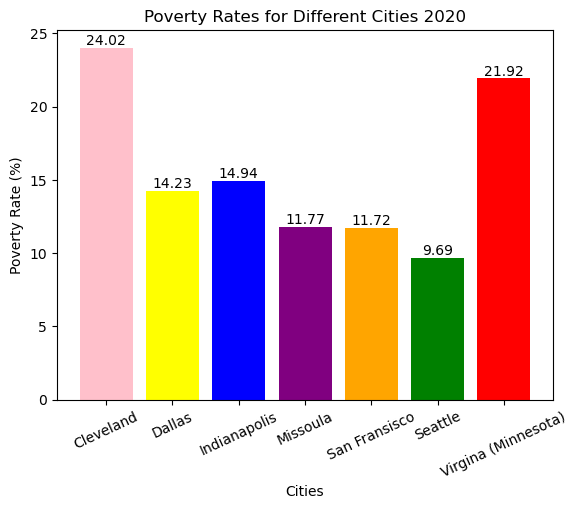

In [113]:
city=list(Complete_rounded_PR_df["City"].values[0:])
povrate=list(Complete_rounded_PR_df["Poverty Rate"].values[0:])

bar_colors = ["Pink", "yellow", "blue", "purple","orange","green","red"]
plt.ylabel("Poverty Rate (%)")
plt.xlabel("Cities")
plt.title("Poverty Rates for Different Cities 2020")
bar1=plt.bar(city,povrate,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar1,labels=povrate,label_type="edge")
plt.show()

In [114]:
Complete_sum_df = pd.concat([cleveland_sum_df,dallas_sum_df,indianapolis_sum_df,missoula_sum_df,sanfransisco_sum_df,
                   seattle_sum_df,virginia_minnesota_sum_df])

Complete_rounded_sum_df = Complete_sum_df.round(2)

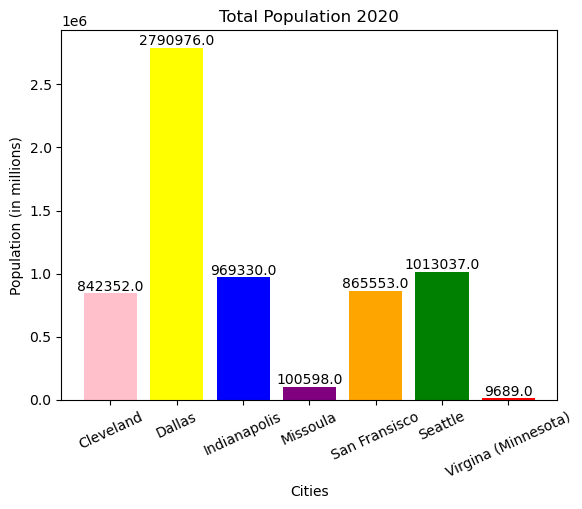

In [115]:
pop=list(Complete_sum_df["Population"].values[0:])

bar_colors = ["Pink", "yellow", "blue", "purple","orange","green","red"]
plt.ylabel("Population (in millions)")
plt.xlabel("Cities")
plt.title("Total Population 2020")
bar2=plt.bar(city,pop,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar2,labels=pop,label_type="edge")
plt.show()

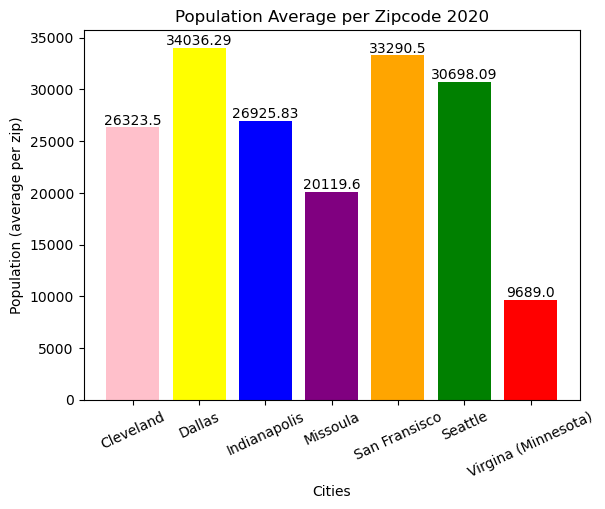

In [116]:
pop_ave=list(Complete_rounded_PR_df["Population"].values[0:])


bar_colors = ["Pink", "yellow", "blue", "purple","orange","green","red"]
plt.ylabel("Population (average per zip)")
plt.xlabel("Cities")
plt.title("Population Average per Zipcode 2020")
bar3=plt.bar(city,pop_ave,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar3,labels=pop_ave,label_type="edge")
plt.show()